Loading in packages and pre set to use on the toy data set

In [2]:
import h5py
import numpy as np

hf = h5py.File('toy_dataset.h5', 'r')
hf.keys()
ecgs = np.array(hf.get('ECGs'))
labels = np.array(hf.get('labels'))



Visualising the 12 channels of the first ecg

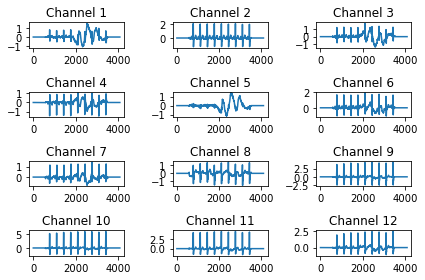

In [3]:
import matplotlib.pyplot as plt

# Assuming 'ecgs' is the variable containing the ECG data
first_ecg = ecgs[0]  # Get the first ECG

# Plotting the 12 channels of the first ECG
for i in range(12):
    plt.subplot(4, 3, i+1)
    plt.plot(first_ecg[:, i])
    plt.title('Channel {}'.format(i+1))

plt.tight_layout()
plt.show()


Visualing the leads the way David did it because he probably understands ECG a bit better than me

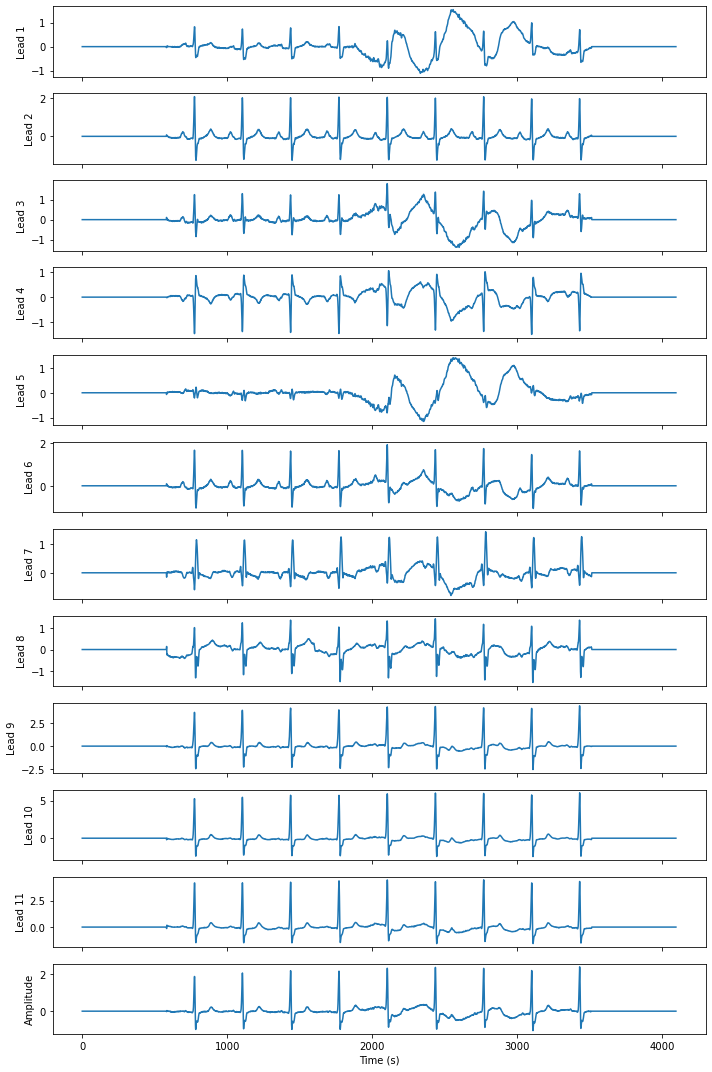

In [4]:
first_ecg = ecgs[0]
fig, axs = plt.subplots(nrows=12, sharex=True, figsize=(10, 15))
for i in range(12):
    axs[i].plot(first_ecg[:, i])
    axs[i].set_ylabel(f'Lead {i+1}')
axs[-1].set_xlabel('Time (s)')
axs[-1].set_ylabel('Amplitude')
plt.tight_layout()
plt.show()

using a simple CNN on the ECG dataset to test if it works

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Assuming 'ecgs' is the variable containing the ECG data
# Assuming 'labels' is the variable containing the corresponding labels

# Split the data into train, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(ecgs, labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Define the CNN model architecture
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on the training set and validate on the validation set
model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_val, y_val))




ModuleNotFoundError: No module named 'tensorflow'

Analysis the effectiveness of the model using test data set and confusion matrix

7/7 [==============================] - 0s 8ms/step
Overall Accuracy: 0.80
Sensitivity (True Positive Rate): 0.73
Specificity (True Negative Rate): 0.83
Overall F1-score: 0.72


C:\Users\omare\AppData\Local\Temp\ipykernel_18164\219404912.py:12: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_pred_classes = (y_pred > 0.5).astype(np.int)
C:\Users\omare\AppData\Local\Temp\ipykernel_18164\219404912.py:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the r

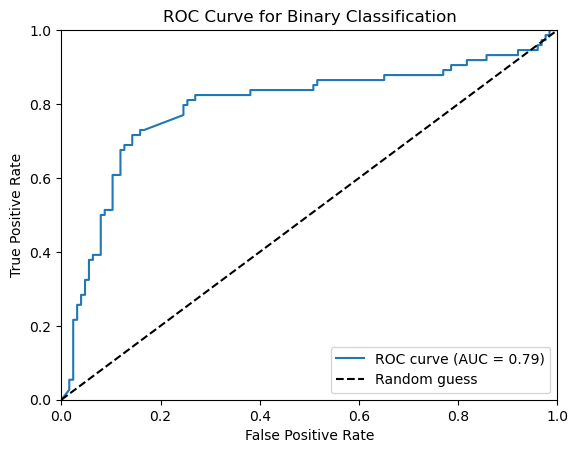

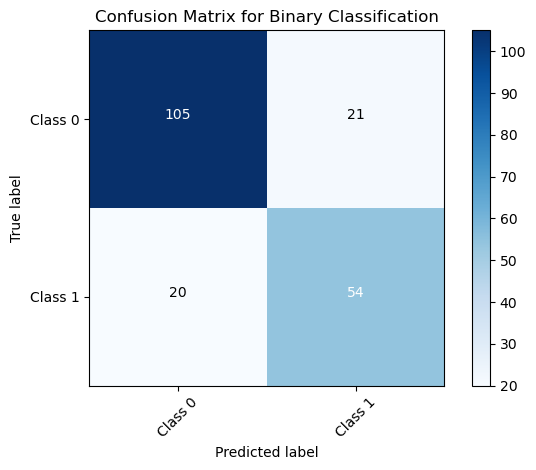

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_curve, roc_auc_score

# Making predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(np.int)
y_true_classes = y_test.astype(np.int)

# Calculate the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Calculate sensitivity and specificity for the positive class (class 1)
true_positives = cm[1, 1]
false_positives = cm[0, 1]
false_negatives = cm[1, 0]
true_negatives = cm[0, 0]

sensitivity = true_positives / (true_positives + false_negatives)
specificity = true_negatives / (true_negatives + false_positives)

# Calculate overall accuracy, F1-score
overall_accuracy = accuracy_score(y_true_classes, y_pred_classes)
overall_f1_score = f1_score(y_true_classes, y_pred_classes)

# Print overall metrics
print(f'Overall Accuracy: {overall_accuracy:.2f}')
print(f'Sensitivity (True Positive Rate): {sensitivity:.2f}')
print(f'Specificity (True Negative Rate): {specificity:.2f}')
print(f'Overall F1-score: {overall_f1_score:.2f}')

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_true_classes, y_pred)
roc_auc = roc_auc_score(y_true_classes, y_pred)
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Binary Classification')
plt.legend(loc="lower right")

plt.show()

# Plot confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Binary Classification')
plt.colorbar()

class_names = ['Class 0', 'Class 1']  # Modify with your class names
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

plt.show()


Adding additional conv1d layers to see if the model can pick anything else up

In [19]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix



# Splitting the data into train, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(ecgs, labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)
# Define the CNN model architecture
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=5, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on the training set and validate on the validation set
model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/15
19/19 [==============================] - 4s 165ms/step - loss: 2.4703 - accuracy: 0.6250 - val_loss: 0.9896 - val_accuracy: 0.7650
Epoch 2/15
19/19 [==============================] - 3s 159ms/step - loss: 0.8611 - accuracy: 0.7767 - val_loss: 0.4982 - val_accuracy: 0.8250
Epoch 3/15
19/19 [==============================] - 3s 169ms/step - loss: 0.4389 - accuracy: 0.8433 - val_loss: 0.5661 - val_accuracy: 0.8100
Epoch 4/15
19/19 [==============================] - 3s 171ms/step - loss: 0.3619 - accuracy: 0.8767 - val_loss: 0.5253 - val_accuracy: 0.8300
Epoch 5/15
19/19 [==============================] - 3s 177ms/step - loss: 0.2978 - accuracy: 0.8800 - val_loss: 0.4660 - val_accuracy: 0.8250
Epoch 6/15
19/19 [==============================] - 4s 224ms/step - loss: 0.1991 - accuracy: 0.9417 - val_loss: 0.5781 - val_accuracy: 0.8200
Epoch 7/15
19/19 [==============================] - 4s 220ms/step - loss: 0.2290 - accuracy: 0.9217 - val_loss: 0.6781 - val_accuracy: 0.8350
Epoch 

7/7 [==============================] - 0s 24ms/step
Overall Accuracy: 0.80
Sensitivity (True Positive Rate): 0.66
Specificity (True Negative Rate): 0.87
Overall F1-score: 0.71


C:\Users\omare\AppData\Local\Temp\ipykernel_18164\2091839190.py:12: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_pred_classes = (y_pred > 0.5).astype(np.int)
C:\Users\omare\AppData\Local\Temp\ipykernel_18164\2091839190.py:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the

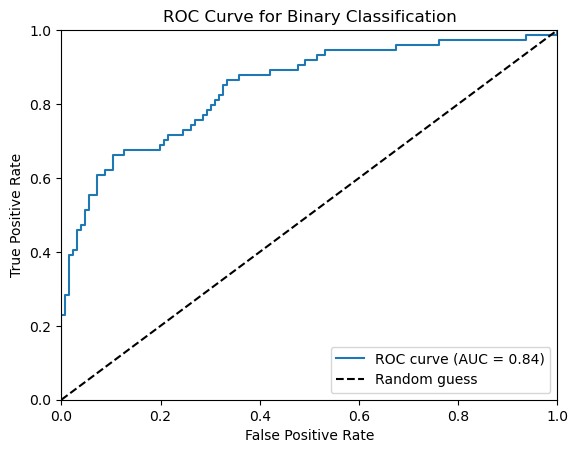

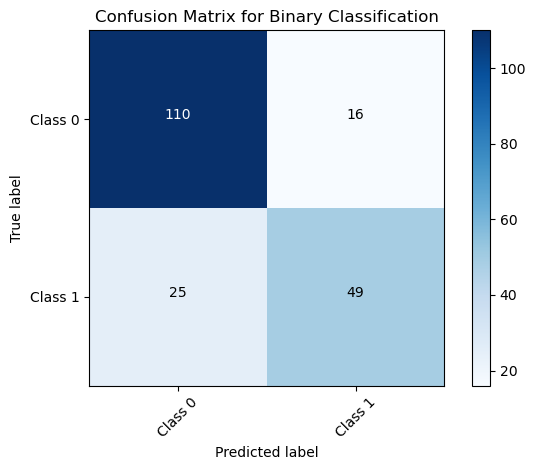

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_curve, roc_auc_score

# Making predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(np.int)
y_true_classes = y_test.astype(np.int)

# Calculate the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Calculate sensitivity and specificity for the positive class (class 1)
true_positives = cm[1, 1]
false_positives = cm[0, 1]
false_negatives = cm[1, 0]
true_negatives = cm[0, 0]

sensitivity = true_positives / (true_positives + false_negatives)
specificity = true_negatives / (true_negatives + false_positives)

# Calculate overall accuracy, F1-score
overall_accuracy = accuracy_score(y_true_classes, y_pred_classes)
overall_f1_score = f1_score(y_true_classes, y_pred_classes)

# Print overall metrics
print(f'Overall Accuracy: {overall_accuracy:.2f}')
print(f'Sensitivity (True Positive Rate): {sensitivity:.2f}')
print(f'Specificity (True Negative Rate): {specificity:.2f}')
print(f'Overall F1-score: {overall_f1_score:.2f}')

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_true_classes, y_pred)
roc_auc = roc_auc_score(y_true_classes, y_pred)
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Binary Classification')
plt.legend(loc="lower right")

plt.show()

# Plot confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Binary Classification')
plt.colorbar()

class_names = ['Class 0', 'Class 1']  # Modify with your class names
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

plt.show()

Overall using more convolutional layers way not very helpful probably because there is not much more detail in the first place to need more conolutional layers

Using some of the implementation mentioned in slack to do the analysis
This is the model that was mentioned in the first paper



In [51]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, ZeroPadding1D, Input, BatchNormalization, Activation
from tensorflow.keras.initializers import glorot_uniform
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

def convolutional_block(X, f, filters, maxpool):
    X = Conv1D(filters=filters, kernel_size=(f), strides=(1), padding='same',
               kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=-1)(X)
    X = Activation('relu')(X)
    X = MaxPooling1D(maxpool, strides=None, padding='same')(X)
    return X

def define_model(input_shape, classes, kernel_initializer=glorot_uniform(seed=0), drop = 0.5):

    # Stage 1
    X_input = Input(input_shape)
    X = ZeroPadding1D((24))(X_input) #remove if input data already zero padded

    # Stage 2
    X = convolutional_block(X, f=5, filters=16, maxpool = 2)
    X = convolutional_block(X, f=5, filters=16, maxpool = 2)
    X = convolutional_block(X, f=5, filters=32, maxpool = 4)
    X = convolutional_block(X, f=3, filters=32, maxpool = 2)
    X = convolutional_block(X, f=3, filters=64, maxpool = 2)
    X = convolutional_block(X, f=3, filters=64, maxpool = 4)

    # Stage 3
    X = Conv1D(filters=128, kernel_size=(3), strides=(1), padding='same',
               kernel_initializer=kernel_initializer)(X)
    X = BatchNormalization(axis=-1)(X)
    X = Activation('relu')(X)

    # Stage 4
    X = Flatten(name='flatten')(X)
    X = Dense(units = 64)(X)
    X = BatchNormalization(axis=-1)(X)
    X = Activation('relu')(X)
    if drop >0:
        X = Dropout(drop)(X)
    X = Dense(units = 32)(X)
    X = BatchNormalization(axis=-1)(X)
    X = Activation('relu')(X)
    if drop >0:
        X = Dropout(drop)(X)

    # Output layer
    X = Dense(classes, activation='sigmoid')(X)

    # Create model
    model = Model(inputs=X_input, outputs=X, name='cnn_ecg')
    return model

Epoch 1/10
19/19 [==============================] - 5s 104ms/step - loss: 0.6856 - accuracy: 0.6267 - val_loss: 0.6043 - val_accuracy: 0.7450
Epoch 2/10
19/19 [==============================] - 2s 91ms/step - loss: 0.4547 - accuracy: 0.8083 - val_loss: 0.4875 - val_accuracy: 0.7950
Epoch 3/10
19/19 [==============================] - 2s 92ms/step - loss: 0.3363 - accuracy: 0.8933 - val_loss: 0.4291 - val_accuracy: 0.8250
Epoch 4/10
19/19 [==============================] - 2s 91ms/step - loss: 0.2796 - accuracy: 0.9150 - val_loss: 0.3989 - val_accuracy: 0.8350
Epoch 5/10
19/19 [==============================] - 2s 92ms/step - loss: 0.2540 - accuracy: 0.9217 - val_loss: 0.3260 - val_accuracy: 0.8950
Epoch 6/10
19/19 [==============================] - 2s 90ms/step - loss: 0.2301 - accuracy: 0.9350 - val_loss: 0.2525 - val_accuracy: 0.9050
Epoch 7/10
19/19 [==============================] - 2s 92ms/step - loss: 0.1960 - accuracy: 0.9517 - val_loss: 0.2365 - val_accuracy: 0.9200
Epoch 8/10
1

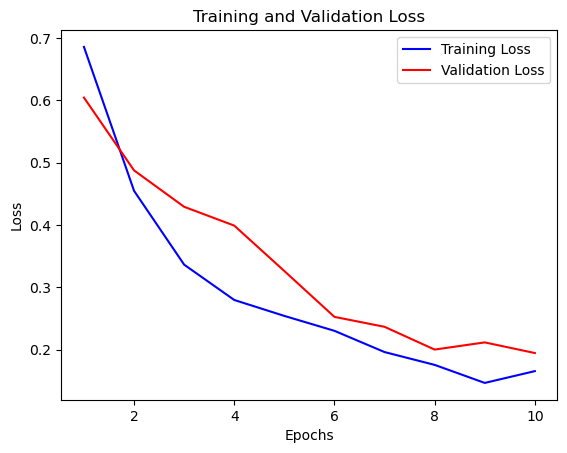

7/7 [==============================] - 0s 21ms/step - loss: 0.1438 - accuracy: 0.9600
Test Loss: 0.14
Test Accuracy: 0.96


In [52]:

# Reshaping y_train and y_val
y_train = np.reshape(y_train, (-1, 1))
y_val = np.reshape(y_val, (-1, 1))

# Defining input shape and number of classes
input_shape = X_train.shape[1:]
num_classes = 1  # For binary classification, set num_classes to 1

# Create the model using the define model function mentioned above
model = define_model(input_shape, num_classes)

# Compile the model on the new function
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

import matplotlib.pyplot as plt

# Train the model and store the history
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

# Access the loss values from the history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create a plot of training and validation losses
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.2f}')
print(f'Test Accuracy: {accuracy:.2f}')



analysing the effectivness of this new model

7/7 [==============================] - 0s 15ms/step
Overall Accuracy: 0.96
Sensitivity (True Positive Rate): 0.91
Specificity (True Negative Rate): 0.99
Overall F1-score: 0.94
              precision    recall  f1-score   support

     Class 0       0.95      0.99      0.97       126
     Class 1       0.99      0.91      0.94        74

    accuracy                           0.96       200
   macro avg       0.97      0.95      0.96       200
weighted avg       0.96      0.96      0.96       200



C:\Users\omare\AppData\Local\Temp\ipykernel_18164\1780557861.py:12: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_pred_classes = (y_pred > 0.5).astype(np.int)
C:\Users\omare\AppData\Local\Temp\ipykernel_18164\1780557861.py:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the

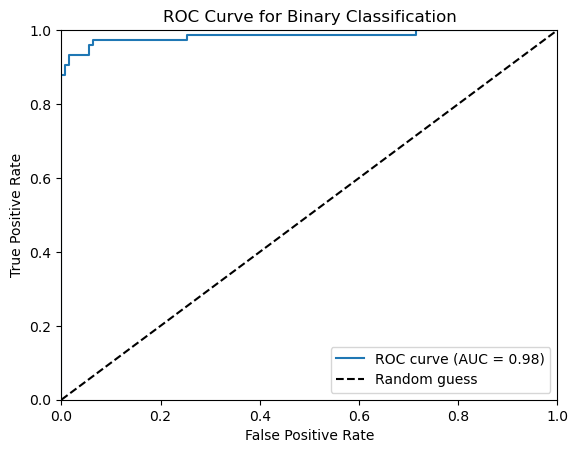

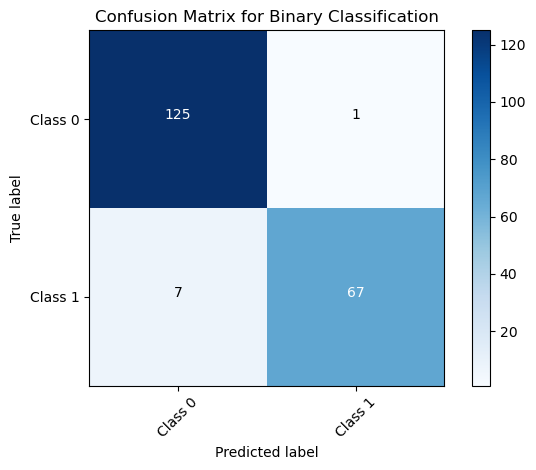

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_curve, roc_auc_score, classification_report


y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(np.int)
y_true_classes = y_test.astype(np.int)

# Calculate the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Calculate sensitivity and specificity for the positive class (class 1)
true_positives = cm[1, 1]
false_positives = cm[0, 1]
false_negatives = cm[1, 0]
true_negatives = cm[0, 0]

sensitivity = true_positives / (true_positives + false_negatives)
specificity = true_negatives / (true_negatives + false_positives)

# Calculate overall accuracy, F1-score
overall_accuracy = accuracy_score(y_true_classes, y_pred_classes)
overall_f1_score = f1_score(y_true_classes, y_pred_classes)

# Print overall metrics
print(f'Overall Accuracy: {overall_accuracy:.2f}')
print(f'Sensitivity (True Positive Rate): {sensitivity:.2f}')
print(f'Specificity (True Negative Rate): {specificity:.2f}')
print(f'Overall F1-score: {overall_f1_score:.2f}')

# Generate classification report
report = classification_report(y_true_classes, y_pred_classes, target_names=['Class 0', 'Class 1'])
print(report)

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_true_classes, y_pred)
roc_auc = roc_auc_score(y_true_classes, y_pred)
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Binary Classification')
plt.legend(loc="lower right")

plt.show()

# Plot confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Binary Classification')
plt.colorbar()

class_names = ['Class 0', 'Class 1']  # Modify with your class names
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

plt.show()

Attempting to use RESNET with model

This RESNET50 is used from the slack

In [54]:
'Resnet'
class ResidualUnit(object):

    def __init__(self, n_samples_out, n_filters_out, kernel_initializer='he_normal',
                 dropout_keep_prob=0.8, kernel_size=17, preactivation=True,
                 postactivation_bn=False, activation_function='relu'):
        self.n_samples_out = n_samples_out
        self.n_filters_out = n_filters_out
        self.kernel_initializer = kernel_initializer
        self.dropout_rate = 1 - dropout_keep_prob
        self.kernel_size = kernel_size
        self.preactivation = preactivation
        self.postactivation_bn = postactivation_bn
        self.activation_function = activation_function

    def _skip_connection(self, y, downsample, n_filters_in):
        """Implement skip connection."""
        # Deal with downsampling
        if downsample > 1:
            y = MaxPooling1D(downsample, strides=downsample, padding='same')(y)
        elif downsample == 1:
            y = y
        else:
            raise ValueError("Number of samples should always decrease.")
        # Deal with n_filters dimension increase
        if n_filters_in != self.n_filters_out:
            # This is one of the two alternatives presented in ResNet paper
            # Other option is to just fill the matrix with zeros.
            y = Conv1D(self.n_filters_out, 1, padding='same',
                       use_bias=False, kernel_initializer=self.kernel_initializer)(y)
        return y

    def _batch_norm_plus_activation(self, x):
        if self.postactivation_bn:
            x = Activation(self.activation_function)(x)
            x = BatchNormalization(center=False, scale=False)(x)
        else:
            x = BatchNormalization()(x)
            x = Activation(self.activation_function)(x)
        return x

    def __call__(self, inputs):
        """Residual unit."""
        x, y = inputs
        n_samples_in = y.shape[1]
        downsample = n_samples_in // self.n_samples_out
        n_filters_in = y.shape[2]
        y = self._skip_connection(y, downsample, n_filters_in)
        # 1st layer
        x = Conv1D(self.n_filters_out, self.kernel_size, padding='same',
                   use_bias=False, kernel_initializer=self.kernel_initializer)(x)
        x = self._batch_norm_plus_activation(x)
        if self.dropout_rate > 0:
            x = Dropout(self.dropout_rate)(x)

        # 2nd layer
        x = Conv1D(self.n_filters_out, self.kernel_size, strides=downsample,
                   padding='same', use_bias=False,
                   kernel_initializer=self.kernel_initializer)(x)
        if self.preactivation:
            x = Add()([x, y])  # Sum skip connection and main connection
            y = x
            x = self._batch_norm_plus_activation(x)
            if self.dropout_rate > 0:
                x = Dropout(self.dropout_rate)(x)
        else:
            x = BatchNormalization()(x)
            x = Add()([x, y])  # Sum skip connection and main connection
            x = Activation(self.activation_function)(x)
            if self.dropout_rate > 0:
                x = Dropout(self.dropout_rate)(x)
            y = x
        return [x, y]


def get_model(n_classes, last_layer='sigmoid'):
    kernel_size = 16
    kernel_initializer = 'he_normal'
    signal = Input(shape=(4096, 12), dtype=np.float32, name='signal')
    x = signal
    x = Conv1D(64, kernel_size, padding='same', use_bias=False,
               kernel_initializer=kernel_initializer)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x, y = ResidualUnit(1024, 128, kernel_size=kernel_size,
                        kernel_initializer=kernel_initializer)([x, x])
    x, y = ResidualUnit(256, 196, kernel_size=kernel_size,
                        kernel_initializer=kernel_initializer)([x, y])
    x, y = ResidualUnit(64, 256, kernel_size=kernel_size,
                        kernel_initializer=kernel_initializer)([x, y])
    x, _ = ResidualUnit(16, 320, kernel_size=kernel_size,
                        kernel_initializer=kernel_initializer)([x, y])
    x = Flatten()(x)
    diagn = Dense(1, activation='sigmoid', kernel_initializer=kernel_initializer)(x)
    model = Model(signal, diagn)
    return model

Training the resnet model

Epoch 1/10
19/19 [==============================] - 30s 1s/step - loss: 0.5051 - accuracy: 0.8100 - val_loss: 37.3782 - val_accuracy: 0.3600
Epoch 2/10
19/19 [==============================] - 37s 2s/step - loss: 0.2540 - accuracy: 0.9067 - val_loss: 5.3928 - val_accuracy: 0.3900
Epoch 3/10
19/19 [==============================] - 38s 2s/step - loss: 0.1805 - accuracy: 0.9417 - val_loss: 1.6947 - val_accuracy: 0.5250
Epoch 4/10
19/19 [==============================] - 38s 2s/step - loss: 0.1449 - accuracy: 0.9550 - val_loss: 0.9809 - val_accuracy: 0.6300
Epoch 5/10
19/19 [==============================] - 38s 2s/step - loss: 0.1476 - accuracy: 0.9550 - val_loss: 1.1478 - val_accuracy: 0.7100
Epoch 6/10
19/19 [==============================] - 38s 2s/step - loss: 0.1812 - accuracy: 0.9383 - val_loss: 0.4729 - val_accuracy: 0.8800
Epoch 7/10
19/19 [==============================] - 38s 2s/step - loss: 0.1244 - accuracy: 0.9600 - val_loss: 0.4156 - val_accuracy: 0.8900
Epoch 8/10
19/19 [=

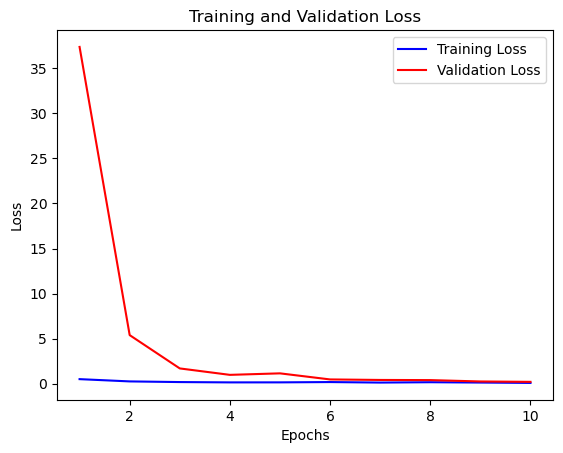

7/7 [==============================] - 2s 326ms/step - loss: 0.1260 - accuracy: 0.9600
Test Loss: 0.1259644776582718
Test Accuracy: 0.9599999785423279


In [55]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Activation, MaxPooling1D, Dropout, Add, Flatten, Dense
from sklearn.model_selection import train_test_split
import numpy as np

# Reshape labels
y_train = np.reshape(y_train, (-1, 1))
y_val = np.reshape(y_val, (-1, 1))
y_test = np.reshape(y_test, (-1, 1))
# Create the model
model = get_model(2)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

import matplotlib.pyplot as plt

# Train the model and store the history
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

# Access the loss values from the history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create a plot of training and validation losses
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)



plotting confusion matrix of the model

7/7 [==============================] - 2s 246ms/step
Overall Accuracy: 0.96
Sensitivity (True Positive Rate): 0.95
Specificity (True Negative Rate): 0.97
Overall F1-score: 0.95
              precision    recall  f1-score   support

     Class 0       0.97      0.97      0.97       126
     Class 1       0.95      0.95      0.95        74

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200



C:\Users\omare\AppData\Local\Temp\ipykernel_18164\2734605849.py:12: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_pred_classes = (y_pred > 0.5).astype(np.int)
C:\Users\omare\AppData\Local\Temp\ipykernel_18164\2734605849.py:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the

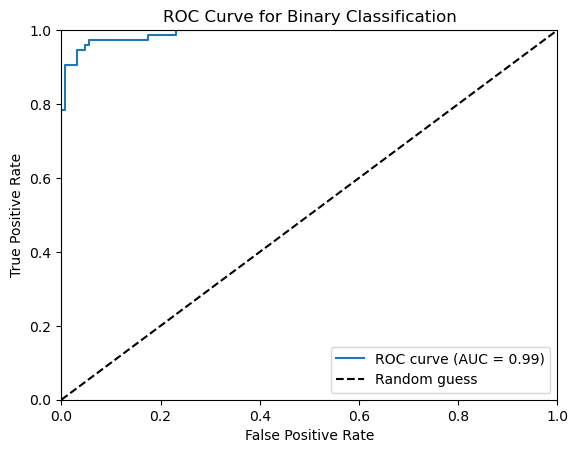

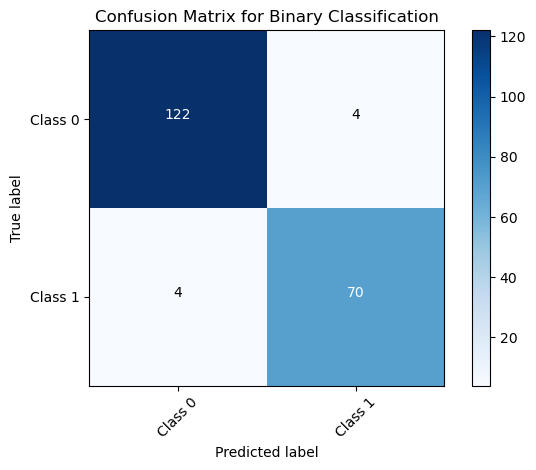

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_curve, roc_auc_score, classification_report


#prediction on the test dataset
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(np.int)
y_true_classes = y_test.astype(np.int)

# Calculate the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Calculate sensitivity and specificity for the positive class (class 1)
true_positives = cm[1, 1]
false_positives = cm[0, 1]
false_negatives = cm[1, 0]
true_negatives = cm[0, 0]

sensitivity = true_positives / (true_positives + false_negatives)
specificity = true_negatives / (true_negatives + false_positives)

# Calculate overall accuracy, F1-score
overall_accuracy = accuracy_score(y_true_classes, y_pred_classes)
overall_f1_score = f1_score(y_true_classes, y_pred_classes)

# Print overall metrics
print(f'Overall Accuracy: {overall_accuracy:.2f}')
print(f'Sensitivity (True Positive Rate): {sensitivity:.2f}')
print(f'Specificity (True Negative Rate): {specificity:.2f}')
print(f'Overall F1-score: {overall_f1_score:.2f}')

# Generate classification report
report = classification_report(y_true_classes, y_pred_classes, target_names=['Class 0', 'Class 1'])
print(report)

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_true_classes, y_pred)
roc_auc = roc_auc_score(y_true_classes, y_pred)
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Binary Classification')
plt.legend(loc="lower right")

plt.show()

# Plot confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Binary Classification')
plt.colorbar()

class_names = ['Class 0', 'Class 1']  # Modify with your class names
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

plt.show()